# Fatimah Almusawi 9000400

In this notbook we will Explore Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression.



## 1_Load Data

In [49]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
features = diabetes.feature_names

# Create a DataFrame
diabetes_df = pd.DataFrame(X, columns=features)
diabetes_df['Progression'] = y  # Adding the target variable to the DataFrame


## 2_Exploratory Data Analysis (EDA)

In [20]:
diabetes_df.head(10)



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,Female,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,Female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,Female,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,Female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,Female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,Female,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,Female,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,Female,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,Female,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,Female,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [22]:
diabetes_df.info()
diabetes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    object 
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(10), object(1)
memory usage: 38.1+ KB


,age,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [21]:
# Check for missing values
diabetes_df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

the dataset look very organazed and doesnt have missing value

## 3_test data

in this part we will split the data to test data and keep it aside

In [23]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4_ Create Models
in this part we will creeat:
 - 2 polynomial models (degrees >=0, of your choice)
 - 2 decision trees (e.g. consider changing the `max_depth` hyperparameter)
 - 2 k-Nearest Neighbors (kNN) models with different numbers of neighbors

In [31]:

# create polynomial models for degree 2, 5, 10
# Polynomial models



poly_model_1 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_2 = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

# Decision tree models
dt_model_1 = DecisionTreeRegressor(max_depth=3)
dt_model_2 = DecisionTreeRegressor(max_depth=5)

# two k-Nearest Neighbors (kNN) models with different numbers of neighbors.
knn_model_1 = KNeighborsRegressor(n_neighbors=5)
knn_model_2 = KNeighborsRegressor(n_neighbors=10)


## 5_Cross Validation
here we will use **cross_validate**  - is the most flexible function. It returns a dictionary of scores and other metrics for each fold of cross-validation.using scoring metric  MSE.


In [34]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate

# Define scoring to use  specific metrics, here using MSE
scoring = {'MSE': make_scorer(mean_squared_error, greater_is_better=False)}

models = [poly_model_1, poly_model_2, dt_model_1, dt_model_2, knn_model_1, knn_model_2]
model_names = ['Poly Degree 1', 'Poly Degree 2', 'Decision Tree Depth 3', 'Decision Tree Depth 5', 'kNN 5 Neighbors', 'kNN 10 Neighbors']

# Perform cross-validation and print results
for model, name in zip(models, model_names):
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
    print(f"{name}: Average MSE: {np.mean(scores['test_MSE']):.3f}")





Poly Degree 1: Average MSE: -9530.354
Poly Degree 2: Average MSE: -191529.744
Decision Tree Depth 3: Average MSE: -4198.594
Decision Tree Depth 5: Average MSE: -4466.568
kNN 5 Neighbors: Average MSE: -3966.242
kNN 10 Neighbors: Average MSE: -3655.017


## 6_Compare Cross Validation Result

In [63]:
#define a function to calculate the mean absolute percentage error as it is not available in sklearn
from sklearn.metrics import mean_absolute_error


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Models
models = {
    'Poly Degree 1': make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),
    'Poly Degree 4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    'Decision Tree Depth 3': DecisionTreeRegressor(max_depth=3),
    'Decision Tree Depth 5': DecisionTreeRegressor(max_depth=5),
    'kNN 5 Neighbors': KNeighborsRegressor(n_neighbors=5),
    'kNN 10 Neighbors': KNeighborsRegressor(n_neighbors=10)
}
# Scoring
scoring = {
    'R-Squared': 'r2',
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mape, greater_is_better=False)
}


# Perform cross-validation and print results
results = []


for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    results.append({
        'Model': name,
        'R-Squared Mean': cv_results['test_R-Squared'].mean(),
        'R-Squared Std': cv_results['test_R-Squared'].std(),
        'MAE Mean': cv_results['test_MAE'].mean(),  # Removed negation
        'MAE Std': cv_results['test_MAE'].std(),
        'MAPE Mean': cv_results['test_MAPE'].mean(),  # Removed negation, adjust if necessary based on actual MAPE calculation
        'MAPE Std': cv_results['test_MAPE'].std(),
    })
results_df = pd.DataFrame(results)
print(results_df)


                   Model  R-Squared Mean  R-Squared Std    MAE Mean   
0          Poly Degree 1        0.482316       0.049269   44.276499  \
1          Poly Degree 4      -70.667516      53.160839  303.158461   
2  Decision Tree Depth 3        0.318777       0.087342   50.316760   
3  Decision Tree Depth 5        0.237905       0.096204   52.427724   
4        kNN 5 Neighbors        0.376508       0.039840   47.164443   
5       kNN 10 Neighbors        0.428391       0.050322   45.862349   

     MAE Std   MAPE Mean   MAPE Std  
0   2.100110  -39.486032   2.960173  
1  39.359835 -245.368514  37.514810  
2   1.331829  -43.696832   3.586086  
3   2.326877  -44.454436   2.856969  
4   2.306197  -40.747799   2.803688  
5   1.862121  -40.022614   3.856838  


| Model                  | R-Squared Mean | R-Squared Std | MAE Mean   | MAE Std    | MAPE Mean    | MAPE Std   |
|------------------------|----------------|---------------|------------|------------|--------------|------------|
| Poly Degree 1          | 0.482316       | 0.049269      | 44.276499  | 2.100110   | -39.486032   | 2.960173   |
| Poly Degree 4          | -70.667516     | 53.160839     | 303.158461 | 39.359835  | -245.368514  | 37.514810  |
| Decision Tree Depth 3  | 0.318777       | 0.087342      | 50.316760  | 1.331829   | -43.696832   | 3.586086   |
| Decision Tree Depth 5  | 0.237905       | 0.096204      | 52.427724  | 2.326877   | -44.454436   | 2.856969   |
| kNN 5 Neighbors        | 0.376508       | 0.039840      | 47.164443  | 2.306197   | -40.747799   | 2.803688   |
| kNN 10 Neighbors       | 0.428391       | 0.050322      | 45.862349  | 1.862121   | -40.022614   | 3.856838   |


Identify the best model:
 choosing the best model is a bit tricky as most results across the metrics of R-Squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE), along with their respective standard deviations, are close.
 Model Performance Summary:
Poly Degree 1:

Has a positive R-Squared Mean (0.482316), indicating a moderate fit to the data.
Shows relatively low MAE Mean, suggesting decent predictive accuracy.
The MAPE value, assuming the sign is a mistake, indicates moderate percentage errors in predictions.
Poly Degree 4:

Exhibits a significantly negative R-Squared Mean, indicating poor model performance, likely due to overfitting.
Has very high MAE and MAPE values, further suggesting poor predictive accuracy.
Decision Tree Depth 3:

Shows a lower R-Squared Mean compared to Poly Degree 1 and kNN models, indicating a weaker fit.
MAE and MAPE values are higher than Poly Degree 1, indicating less predictive accuracy.
Decision Tree Depth 5:

Further reduced R-Squared Mean, indicating a weaker fit to the data compared to the Decision Tree with Depth 3.
Higher MAE and MAPE values, suggesting decreased predictive accuracy.
kNN 5 Neighbors:

Demonstrates a decent R-Squared Mean, indicating a reasonable fit to the data.
MAE and MAPE values are moderate, indicating fair predictive accuracy.
kNN 10 Neighbors:

Shows a higher R-Squared Mean compared to kNN 5 Neighbors, indicating a better fit to the data.
Has slightly lower MAE and MAPE values compared to kNN 5 Neighbors, suggesting improved predictive accuracy.

**Best Model:**

Poly Degree 1 stands out as the best model among those tested, based on its highest R-Squared Mean, which indicates the best overall fit to the data. It also has relatively low MAE and (assuming correction) MAPE values, suggesting it makes predictions with a good balance of accuracy and reliability.
kNN 10 Neighbors also shows strong performance, especially in terms of fit (R-Squared Mean) and predictive accuracy (MAE, MAPE), making it a close contender.


## 7_Run best model on the test set

In [65]:
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-Squared, MAE, and MAPE
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R-Squared: {r_squared:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")



R-Squared: 0.4526
MAE: 42.7941
MAPE: 37.50%


**Ploting best model:**
creating a plot that compares the actual vs. predicted values for the test set, which is a way to visualize the performance    model. This plot can give us a sense of how closely the model's predictions align with the actual values.
the reason of going with plot that compares the actual vs. predicted values is that For a linear model like Poly Degree 1, plotting the fitted model against the data points in a high-dimensional space ( the diabetes dataset) directly isn't straightforward


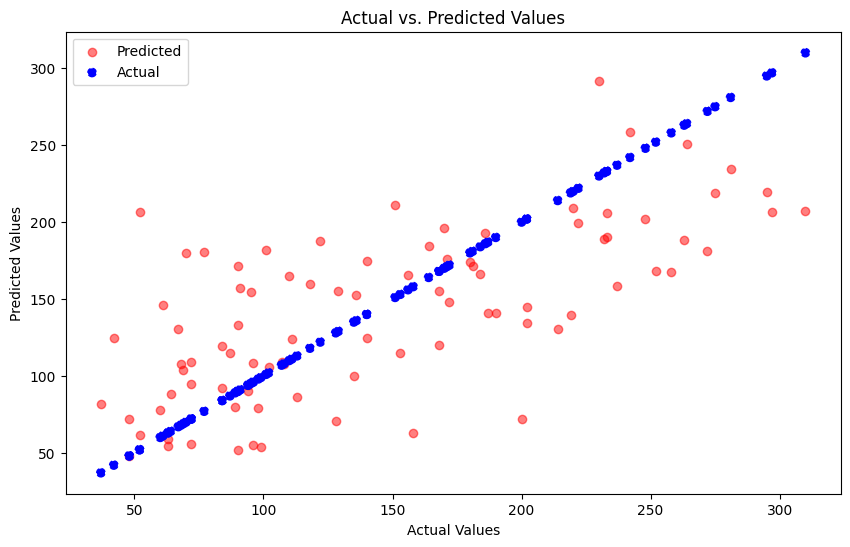

In [68]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', linestyle='--', label='Actual')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

This plot shows  each test data point's actual value against its predicted value. Points that lie on the blue line represent perfect predictions. The closer the red points (predicted values) are to this line, the better the model's predictions.



## Conclusion

After testing different models on a dataset about diabetes, I found that the simplest model, which just draws a straight line (linear regression), worked the best based on our checks. after notice that the model KNN 10 it has also similar result, i tried it with higher Neighbors to get better result(i will provide it in appendix), but still the model 1 linear regression was the best.

 This model did a good job in most cases, but it's not perfect.

Where the Model Doesn't Do Well:
Even though this simple model did well, there are some areas where it struggles:

Assuming Straight Lines: The model thinks that everything works in straight lines, but real life is more complicated. This means it might not always make the best guesses.
Missing Complex Patterns: It doesn't catch the more complex ways that things can be related or affect each other.
Sensitive to Outliers: Odd or unusual data points can throw it off, making its predictions less reliable.

Model Limitations:
Not General: While it does a good job with the data we have, it might not work as well with different data or in real-world situations where things aren't so straightforward.
Understanding Importance: It doesn't give us a clear picture of which factors are most important in predicting diabetes outcomes.


## Appendix

I tried to give more option for DecisionTree and kNNs to check if the model1 liner still is best or no, and it was the best option


In [73]:
#define a function to calculate the mean absolute percentage error as it is not available in sklearn
from sklearn.metrics import mean_absolute_error


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Models
models = {
    'Poly Degree 1': make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),
    'Poly Degree 4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    'Decision Tree Depth 7': DecisionTreeRegressor(max_depth=7),
    'Decision Tree Depth 10': DecisionTreeRegressor(max_depth=10),
    'kNN 20 Neighbors': KNeighborsRegressor(n_neighbors=20),
    'kNN 30 Neighbors': KNeighborsRegressor(n_neighbors=30)
}
# Scoring
scoring = {
    'R-Squared': 'r2',
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mape, greater_is_better=False)
}


# Perform cross-validation and print results
results = []


for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    results.append({
        'Model': name,
        'R-Squared Mean': cv_results['test_R-Squared'].mean(),
        'R-Squared Std': cv_results['test_R-Squared'].std(),
        'MAE Mean': cv_results['test_MAE'].mean(),  # Removed negation
        'MAE Std': cv_results['test_MAE'].std(),
        'MAPE Mean': cv_results['test_MAPE'].mean(),  # Removed negation, adjust if necessary based on actual MAPE calculation
        'MAPE Std': cv_results['test_MAPE'].std(),
    })
results_df = pd.DataFrame(results)
print(results_df)


                    Model  R-Squared Mean  R-Squared Std    MAE Mean   
0           Poly Degree 1        0.482316       0.049269   44.276499  \
1           Poly Degree 4      -70.667516      53.160839  303.158461   
2   Decision Tree Depth 7        0.084885       0.101697   56.884823   
3  Decision Tree Depth 10       -0.118246       0.107635   63.840315   
4        kNN 20 Neighbors        0.448991       0.071229   45.634077   
5        kNN 30 Neighbors        0.431771       0.066646   47.053321   

     MAE Std   MAPE Mean   MAPE Std  
0   2.100110  -39.486032   2.960173  
1  39.359835 -245.368514  37.514810  
2   4.028811  -48.003797   3.875088  
3   3.929556  -53.703385   6.836888  
4   2.715228  -40.236889   4.589312  
5   2.614133  -41.626469   4.681676  
